# Columns Explanations

- bmonth
→ The month in which the data or application was recorded (e.g., January, February).

- bcredit_amount
→ The total amount of money requested or given as a loan.

- credit_term
→ The duration (usually in months) over which the credit/loan has to be repaid.

- bage
→ The age of the applicant or client (in years).

- bsex
→ The gender of the person (e.g., Male or Female).

- beducation
→ The educational qualification of the applicant (e.g., High School, Graduate, etc.).

- bproduct_type
→ The type of loan or financial product (e.g., personal loan, mortgage, auto loan).

- bhaving_children_flg
→ A flag indicating whether the person has children (1 = Yes, 0 = No).

- bregion
→ The geographical region or area where the client lives or applied for credit.

- bincome
→ The monthly or yearly income of the applicant.

- bfamily_status
→ The marital or family status (e.g., Single, Married, Divorced).

- bphone_operator
→ The mobile network operator used by the client, possibly used to identify communication reach.

- bis_client
→ A flag to show if the person is already an existing client (1 = Yes, 0 = No).

- bbad_client_target
→ The target variable indicating whether the client defaulted or is risky (1 = Bad client, 0 = Good client).

# Hypotheses

- Lower age is associated with higher default risk.
- Gender affects loan repayment behavior.
- Having children increases financial burden, leading to defaults.
- Clients with lower income are more likely to be bad clients
- Less educated clients have higher chances of being bad clients.
- Marital status impacts financial discipline.
- Phone operator type may reflect social/economic class.
- Clients with higher credit amounts are more likely to default. Larger loan sizes increase default risk.
- Shorter repayment durations have lower default risk.
- Existing clients (is_client=1) are less likely to default. Known clients have better repayment history.
- Region may influence risk due to local economic conditions.
- Some product types are more likely to be associated with defaults
- Seasonal trends impact default behavior.
- Clients with high loan amount and low income are most likely to default

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clients.csv')
df

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,12,18500,6,32,male,Higher education,Cell phones,1,2,46000,Another,1,1,0
1719,12,6500,6,24,male,Secondary special education,Cell phones,0,2,18000,Another,0,1,0
1720,12,5500,12,21,male,Incomplete higher education,Cell phones,0,2,15000,Another,1,1,0
1721,12,30500,10,25,female,Incomplete higher education,Cell phones,0,2,41000,Another,2,1,1


In [5]:
df.columns

Index(['month', 'credit_amount', 'credit_term', 'age', 'sex', 'education',
       'product_type', 'having_children_flg', 'region', 'income',
       'family_status', 'phone_operator', 'is_client', 'bad_client_target'],
      dtype='object')

In [7]:
df['bad_client_target'].value_counts()


bad_client_target
0    1527
1     196
Name: count, dtype: int64

In [9]:
df.isnull().sum()

month                  0
credit_amount          0
credit_term            0
age                    0
sex                    0
education              0
product_type           0
having_children_flg    0
region                 0
income                 0
family_status          0
phone_operator         0
is_client              0
bad_client_target      0
dtype: int64

# EDA (Exploratory Data Analysis)

- Younger people (20s and early 30s) are more likely to default on loans.
- Default rate decreases as age increases — older clients are more financially stable.

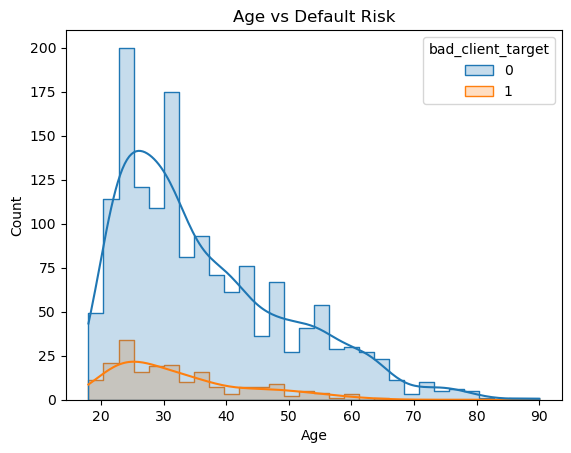

In [11]:
# Lower age is associated with higher default risk.
sns.histplot(data=df, x='age', hue='bad_client_target', bins=30, kde=True, element='step')
plt.title('Age vs Default Risk')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- Female clients default slightly more than males in this dataset.
- But difference is not very big — gender alone doesn’t guarantee risk.

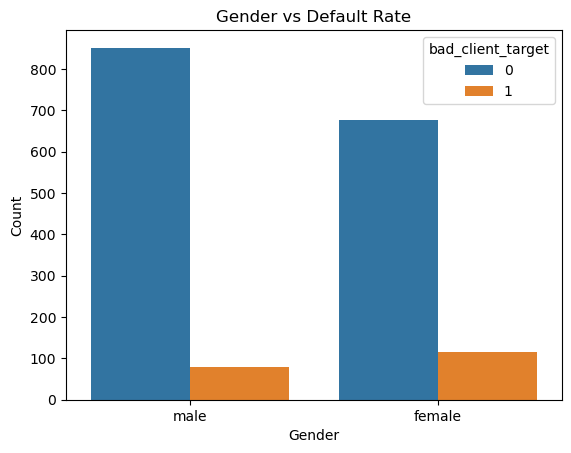

In [12]:
# Gender affects loan repayment behavior.
sns.countplot(data=df, x='sex', hue='bad_client_target')
plt.title('Gender vs Default Rate')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


- Clients with children are slightly more likely to default.
- Having dependents may cause extra financial pressure.

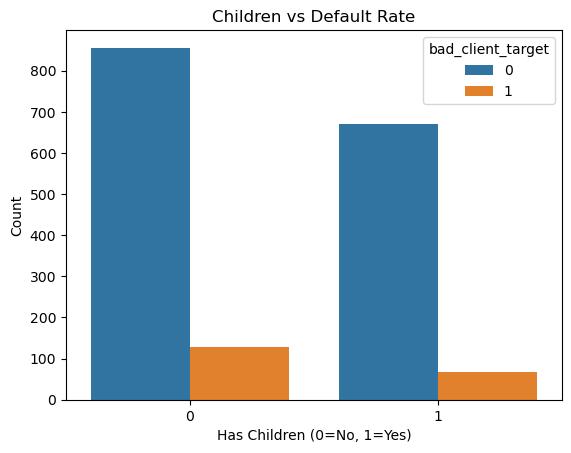

In [113]:
# Having children increases financial burden, leading to defaults.
sns.countplot(data=df, x='having_children_flg', hue='bad_client_target')
plt.title('Children vs Default Rate')
plt.xlabel('Has Children (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


- Bad clients usually have lower income than good clients.
- High income reduces default chances, but not 100% safe.

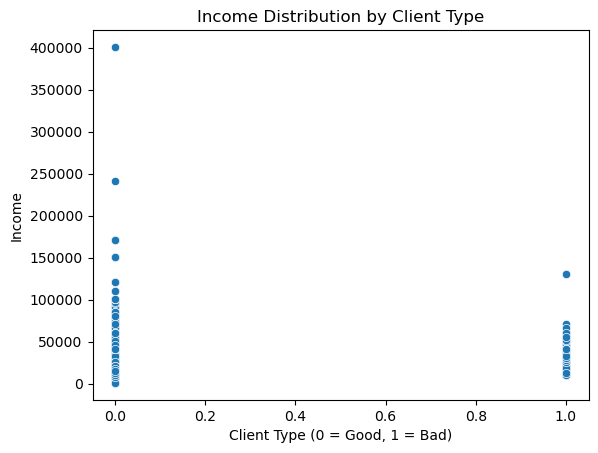

In [16]:
# Clients with lower income are more likely to be bad clients
sns.scatterplot(data=df, x='bad_client_target', y='income')
plt.title('Income Distribution by Client Type')
plt.xlabel('Client Type (0 = Good, 1 = Bad)')
plt.ylabel('Income')
plt.show()


- Default is highest among people with secondary special education.
- Clients with higher education default less — better job, stable income.

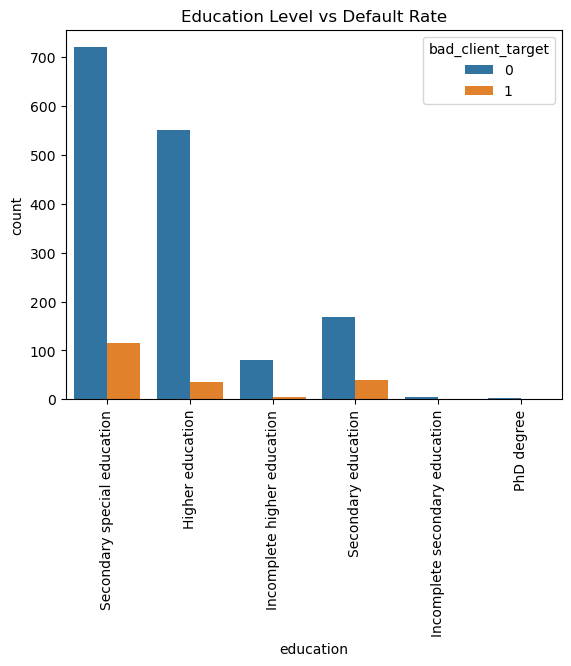

In [19]:
# Less educated clients have higher chances of being bad clients.
sns.countplot(data=df, x='education', hue='bad_client_target')
plt.title('Education Level vs Default Rate')
plt.xticks(rotation=90)
plt.show()


- Married people default less than those in the "another" or "unmarried" category.
- Being married may support better financial discipline.

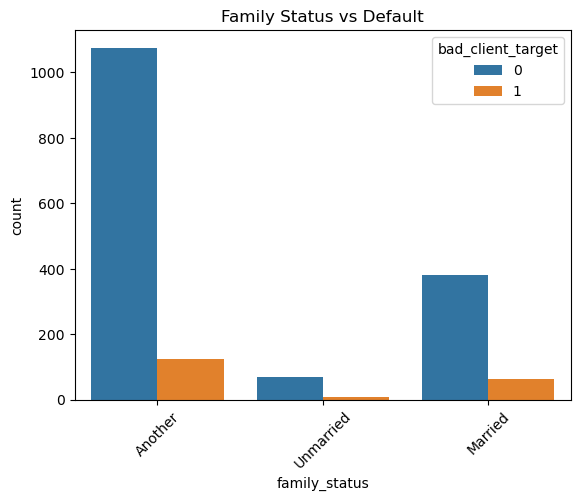

In [20]:
# Marital status impacts financial discipline.
sns.countplot(data=df, x='family_status', hue='bad_client_target')
plt.title('Family Status vs Default')
plt.xticks(rotation=45)
plt.show()


- People using operator types 0 and 1 default more than others.
- This could reflect socioeconomic class or rural/urban divide.

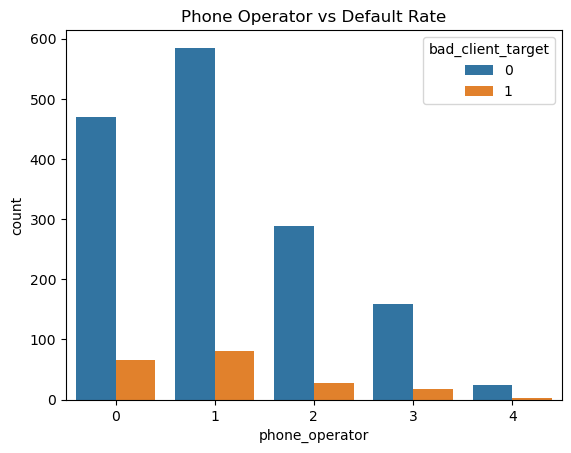

In [21]:
# Phone operator type may reflect social/economic class.
sns.countplot(data=df, x='phone_operator', hue='bad_client_target')
plt.title('Phone Operator vs Default Rate')
plt.show()


-  Bad clients usually take slightly smaller loans than good clients.
- This suggests even small loans are risky for financially weak clients.

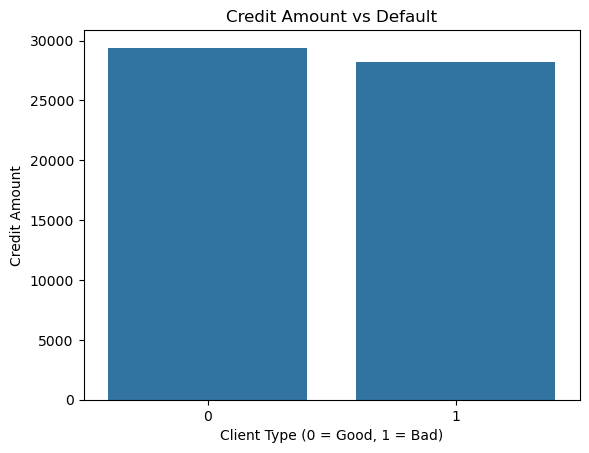

In [22]:
# Clients with higher credit amounts are more likely to default. Larger loan sizes increase default risk.
sns.barplot(data=df, x='bad_client_target', y='credit_amount' , errorbar = None)
plt.title('Credit Amount vs Default')
plt.xlabel('Client Type (0 = Good, 1 = Bad)')
plt.ylabel('Credit Amount')
plt.show()


- Bad clients tend to choose longer repayment durations.
- Longer terms may seem easier but indicate lack of financial strength.

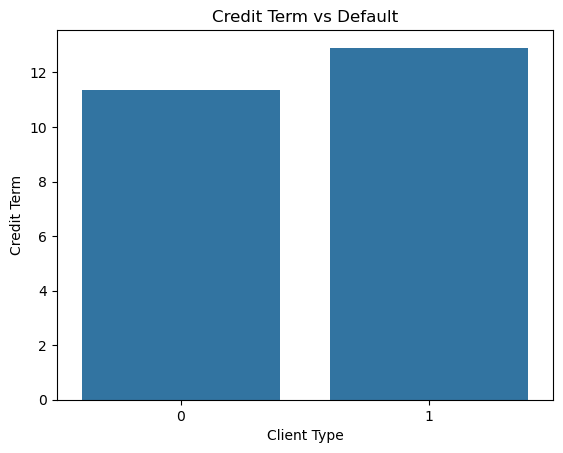

In [23]:
# Shorter repayment durations have lower default risk.
sns.barplot(data=df, x='bad_client_target', y='credit_term' , errorbar = None)
plt.title('Credit Term vs Default')
plt.xlabel('Client Type')
plt.ylabel('Credit Term')
plt.show()


- New Clients (0) have a higher default rate than Existing Clients (1).
- This suggests that loyal, long-term clients are less likely to default compared to new customers.

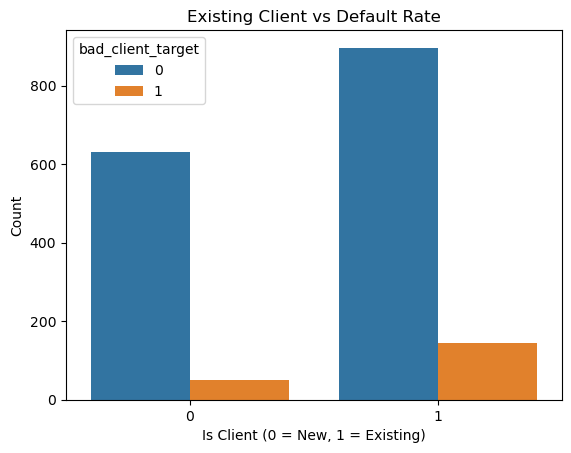

In [24]:
# Existing clients (is_client=1) are less likely to default. Known clients have better repayment history.
sns.countplot(data=df, x='is_client', hue='bad_client_target')
plt.title('Existing Client vs Default Rate')
plt.xlabel('Is Client (0 = New, 1 = Existing)')
plt.ylabel('Count')
plt.show()


- Some regions have significantly higher defaults than others.
- This could be due to economic conditions, local policies, or cultural factors.

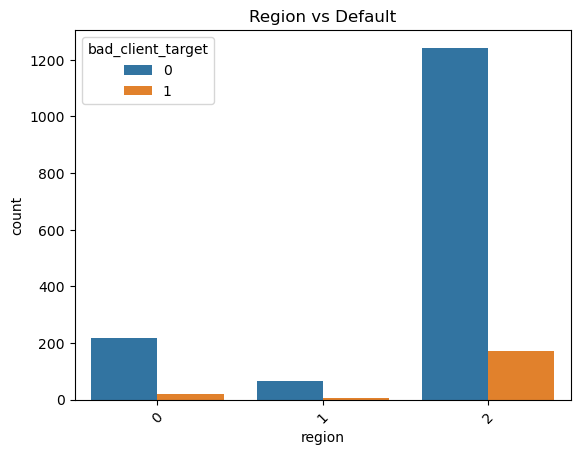

In [26]:
# Region may influence risk due to local economic conditions.
sns.countplot(data=df, x='region', hue='bad_client_target')
plt.title('Region vs Default')
plt.xticks(rotation=45)
plt.show()


- Cell phones, Clothing, Tourism, Repair Services (more people default on these loans).
- Medical services, Construction Machines, Garden affiliations (more reliable repayments).

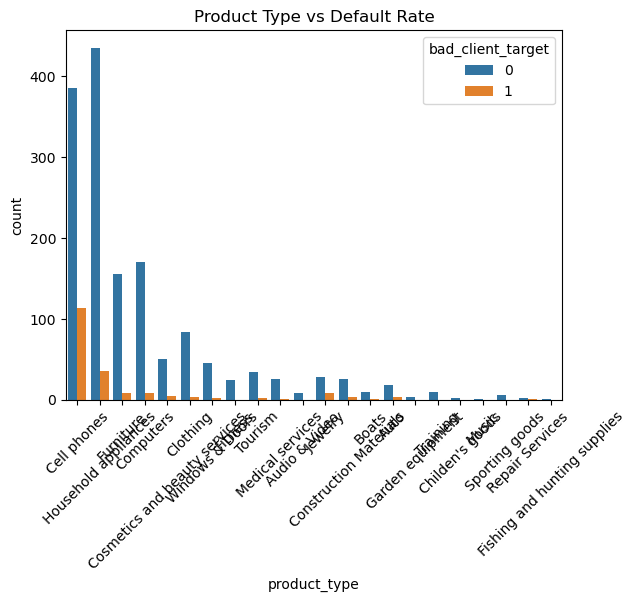

In [27]:
# Some product types are more likely to be associated with defaults
sns.countplot(data=df, x='product_type', hue='bad_client_target')
plt.title('Product Type vs Default Rate')
plt.xticks(rotation=45)
plt.show()


- Defaults peak in certain months (e.g., holiday seasons or economic downturns).
- Could be linked to seasonal spending (e.g., December holidays) or job instability.

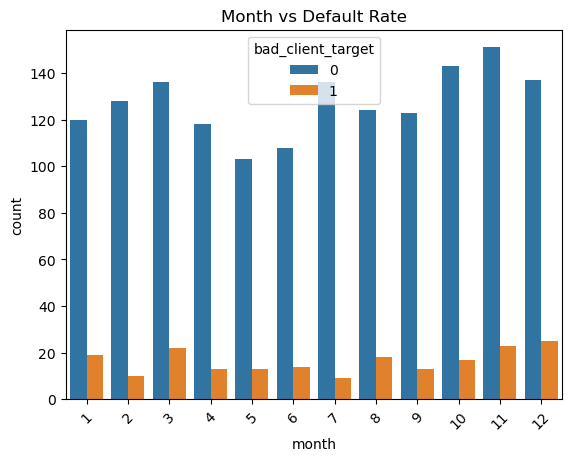

In [28]:
# Seasonal trends impact default behavior.
sns.countplot(data=df, x='month', hue='bad_client_target', order=sorted(df['month'].unique()))
plt.title('Month vs Default Rate')
plt.xticks(rotation=45)
plt.show()


- Higher loan-to-income ratio = Higher default risk.
- If someone borrows more than they earn, they’re more likely to default.

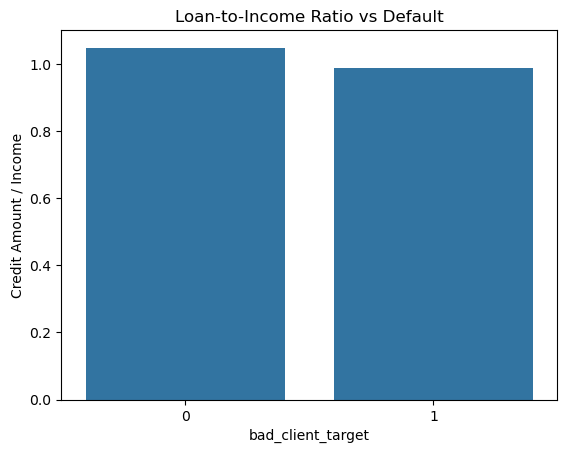

In [29]:
# Clients with high loan amount and low income are most likely to default
df['loan_to_income'] = df['credit_amount'] / (df['income'] + 1)

sns.barplot(data=df, x='bad_client_target', y='loan_to_income' , errorbar = None)
plt.title('Loan-to-Income Ratio vs Default')
plt.ylabel('Credit Amount / Income')
plt.show()


In [30]:
df.dtypes

month                    int64
credit_amount            int64
credit_term              int64
age                      int64
sex                     object
education               object
product_type            object
having_children_flg      int64
region                   int64
income                   int64
family_status           object
phone_operator           int64
is_client                int64
bad_client_target        int64
loan_to_income         float64
dtype: object

In [46]:
df['family_status'].value_counts()

family_status
Another      1201
Married       444
Unmarried      78
Name: count, dtype: int64

# Data Cleaning

# -> label Encoding on Object columns

In [50]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of your DataFrame to avoid overwriting the original
df_encoded = df.copy()

# Identify all object (categorical) columns
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [52]:
df_encoded.dtypes

month                    int64
credit_amount            int64
credit_term              int64
age                      int64
sex                      int32
education                int32
product_type             int32
having_children_flg      int64
region                   int64
income                   int64
family_status            int32
phone_operator           int64
is_client                int64
bad_client_target        int64
loan_to_income         float64
dtype: object

# Handling Imbalance Using SMOTE

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# -> Features and target 

In [64]:
X = df_encoded.drop('bad_client_target' , axis = 1)
y = df_encoded['bad_client_target']


# -> Train - test split before SMOTE

In [67]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)


# ->Apply SMOTE  only on training data

In [70]:
smote = SMOTE(random_state = 42)
X_train_res , y_train_res = smote.fit_resample(X_train , y_train)

# -> Check class distribution after resampling

In [75]:
from collections import Counter
print("Before SMOTE: " , Counter(y_train))
print("After SMOTE: " , Counter(y_train_res))

Before SMOTE:  Counter({0: 1222, 1: 156})
After SMOTE:  Counter({0: 1222, 1: 1222})


# -> Train model on SMOTE data

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train model on balanced data
model_smote = RandomForestClassifier(random_state = 42)
model_smote.fit(X_train_res , y_train_res)

# Predict on original test set
y_pred_smote = model_smote.predict(X_test)

#Evaluate
print("Evaluation using SMOTE:")
print(classification_report(y_test , y_pred_smote))

Evaluation using SMOTE:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       305
           1       0.36      0.38      0.37        40

    accuracy                           0.85       345
   macro avg       0.64      0.64      0.64       345
weighted avg       0.85      0.85      0.85       345



# -> Train model on original imbalanced data (baseline)

In [87]:
model_base = RandomForestClassifier(random_state=42)
model_base.fit(X_train, y_train)

y_pred_base = model_base.predict(X_test)

print(" Evaluation on Imbalanced Data (Baseline):")
print(classification_report(y_test, y_pred_base))


 Evaluation on Imbalanced Data (Baseline):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       305
           1       0.00      0.00      0.00        40

    accuracy                           0.88       345
   macro avg       0.44      0.50      0.47       345
weighted avg       0.78      0.88      0.83       345



# -> Train with class_weight='balanced'

In [90]:
model_weight = RandomForestClassifier(class_weight='balanced', random_state=42)
model_weight.fit(X_train, y_train)

y_pred_weight = model_weight.predict(X_test)

print(" Evaluation with Class Weight:")
print(classification_report(y_test, y_pred_weight))


 Evaluation with Class Weight:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       305
           1       1.00      0.03      0.05        40

    accuracy                           0.89       345
   macro avg       0.94      0.51      0.49       345
weighted avg       0.90      0.89      0.84       345



# -> Train model on undersampled data

In [101]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state =42)
X_train_rus , y_train_rus = rus.fit_resample(X_train , y_train)
print("Before sampling: " , Counter(y_train))
print("After sampling: " , Counter(y_train_rus))

Before sampling:  Counter({0: 1222, 1: 156})
After sampling:  Counter({0: 156, 1: 156})


In [99]:
model_rus = RandomForestClassifier(random_state = 42)
model_rus.fit(X_train_rus , y_train_rus)

y_pred_rus = model_rus.predict(X_test)

print("Evaluation with Random Undersampling : ")
print(classification_report(y_test , y_pred_rus))

Evaluation with Random Undersampling : 
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       305
           1       0.21      0.60      0.31        40

    accuracy                           0.69       345
   macro avg       0.57      0.65      0.56       345
weighted avg       0.85      0.69      0.75       345

